In [49]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# Import the different mountains from mountain.py
from mountain import Mountain_one

# Part 2 - Report

### Exercise 6

Expressing this problem formally as a MDP is simple:

The finite set of states $\mathcal{S}$ is equal to every possible position in the gridworld.

The finite set of actions $\mathcal{A}$ is composed of the directions *right*, *up-right* and *down-right*.

As the robot's actions are deterministic, he transition probability matrix $\mathcal{T}$ is composed of all 1s.

The reward function $\mathcal{R}$ is equal to the negative roughness index of the gridworld.

The discount factor $\gamma$ is arbitrary, but lets set it to 0.5.

The policy $\pi_\text{str}$ of walking straight ahead means that the row of the robot in the gridworld stays constant.

Given starting state s = (row, column) = (i, j), the value function can be computed as:

$ v_{\pi_\text{str}}(i, j) = R(i, j) + \gamma v_{\pi_\text{str}}(i, j+1)$

In [50]:
# Instantiate the mountain environment
mountain = Mountain_one()
m, n = len(mountain.get_map()), len(mountain.get_map()[0])

# Set the gamma value
gamma = 0.5

In [51]:
# Then create the given policy π_str following format (probability, action)
π_str = np.array([[[(0.0, "upforward"), (1.0 if column < n-1 else 0.0, "forward"), (0.0, "downforward")] for column in range(n)] for row in range(m)], dtype="object")

In [52]:
# Let's run the policy evaluation on the given environment

# Left-to-right
evaluation_ltr = [[0] * n for _ in range(m)]
for k in range(5): # Run evaluation for 5 episodes
    for column in range(n):
        for row in range(m):
            state = (row, column)
            for probability, action in π_str[state]:
                if probability > 0:
                    (next_row, next_column) = mountain.next_state(state, action)

                    evaluation = mountain.get_reward(state, action)
                    evaluation += gamma * evaluation_ltr[next_row][next_column]
                    evaluation *= probability

                    evaluation_ltr[row][column] = evaluation

# Right-to-left
evaluation_rtl = [[0] * n for _ in range(m)]
for k in range(5): # Run evaluation for 5 episodes
    for column in reversed(range(n)):
        for row in range(m):
            state = (row, column)
            for probability, action in π_str[state]:
                if probability > 0:
                    (next_row, next_column) = mountain.next_state(state, action)
                    
                    evaluation = mountain.get_reward(state, action)
                    evaluation += gamma * evaluation_ltr[next_row][next_column]
                    evaluation *= probability

                    evaluation_rtl[row][column] = evaluation

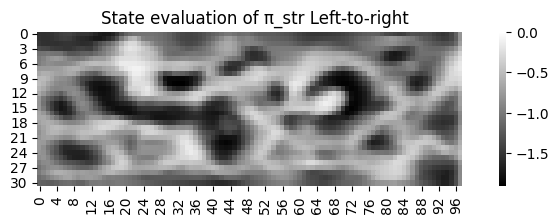

In [53]:
# Let's plot the values as a heatmap
plt.figure(figsize=(7,2))
sns.heatmap(evaluation_ltr, cmap="gray")
plt.title("State evaluation of π_str Left-to-right")
plt.show()

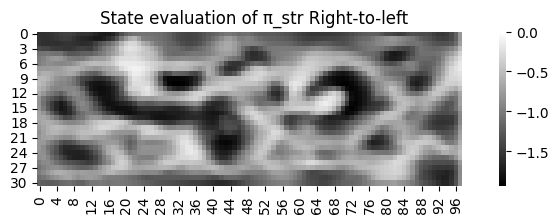

In [54]:
# Let's plot the values as a heatmap
plt.figure(figsize=(7,2))
sns.heatmap(evaluation_rtl, cmap="gray")
plt.title("State evaluation of π_str Right-to-left")
plt.show()

In [55]:
evaluation_rtl == evaluation_ltr

False

------------------------------------------
### 3. (*)

The resulting evaluations are very similar, as we can see from the plots. However, they are not exactly equal. They differ because we are using results from the current iteration on the right-to-left approach, but results from the last iteration when doing the left-to-right apporach. Therefore they will converge slightly differently. However, as they both converge towards a common target they will be very similar.

------------------------------------------

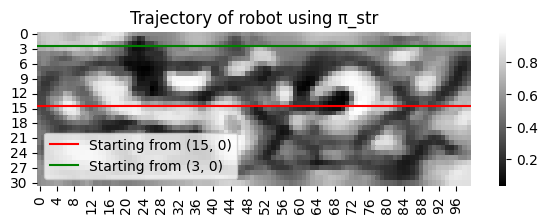

In [56]:
# Plot the trajectory followed by the robot starting from (15, 0) or (3, 0)
plt.figure(figsize=(7,2))
sns.heatmap(mountain.get_map(), cmap="gray")
plt.plot([0, n], [15, 15], c="r", label="Starting from (15, 0)")
plt.plot([0, n], [3, 3], c="g", label="Starting from (3, 0)")
plt.title("Trajectory of robot using π_str")
plt.legend()
plt.show()

The optimal starting row for the policy $\pi_\text{str}$ is equal to the row with the maximal value at column 0.

In [57]:
optimal_starting_row = np.argmax(np.array(evaluation_ltr)[:, 0])
print("Optimal starting row for π_str is", optimal_starting_row)

Optimal starting row for π_str is 10


------------------------------------------
### 7. (*)

No, the two policy evaluations are equal, and therefore we have learned the same thing.

------------------------------------------

The policy $\pi_\text{rnd}$ means that we have a $\frac{1}{3}$ chance of either walking up-right, right or down-right.

Given starting state s = (row, column) = (i, j), the value function can be computed as:

$ v_{\pi_\text{rnd}}(i, j) = \frac{1}{3} * (R((i, j), \text{"upforward"}) + \gamma (v_{\pi_\text{rnd}}(i-1, j+1)) + R((i, j), \text{"forward"}) + \gamma v_{\pi_\text{rnd}}(i, j+1) + R((i, j), \text{"downforward"}) + \gamma v_{\pi_\text{rnd}}(i+1, j+1))$

(*if we are in the middle rows, if we are at either edge row, moving up/down is not allowed and we then only divide by 2).

In [58]:
# Then create the random policy π_rnd
π_rnd = np.array([[[(0.0 if row == 0 or column == n-1 else 0.5 if row == m-1 else 1/3, "upforward"), (0.0 if column == n-1 else 0.5 if row == 0 or row == m-1 else 1/3, "forward"), (0.0 if row == m-1 or column == n-1 else 0.5 if row == 0 else 1/3, "downforward")] for column in range(n)] for row in range(m)], dtype="object")

In [59]:
# Let's run the policy evaluation using this new random policy
evaluation_rnd = [[0] * n for _ in range(m)]
for k in range(5): # Run evaluation for 5 episodes
    for column in reversed(range(n)):
        for row in range(m):
            state = (row, column)
            for probability, action in π_rnd[state]:
                if probability > 0:
                    (next_row, next_column) = mountain.next_state(state, action)
                    
                    evaluation = mountain.get_reward(state, action)
                    evaluation += gamma * evaluation_ltr[next_row][next_column]
                    evaluation *= probability

                    evaluation_rnd[row][column] = evaluation

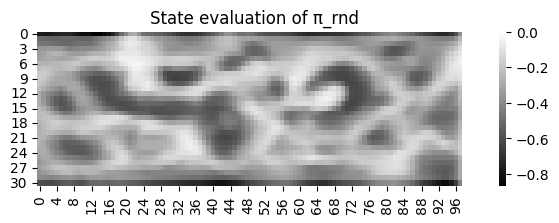

In [60]:
# Let's plot the values as a heatmap
plt.figure(figsize=(7,2))
sns.heatmap(evaluation_rnd, cmap="gray")
plt.title("State evaluation of π_rnd")
plt.show()

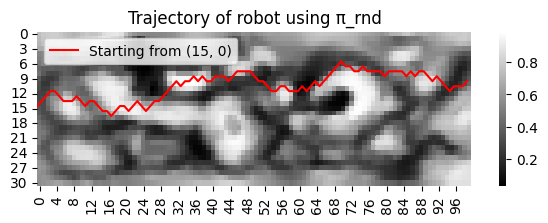

In [61]:
# Sample a trajectory following the random policy
trajectory = [15]
for column in range(n-1):
    current_row = trajectory[column]
    action = np.random.choice(π_rnd[current_row, column, :, 1], p=π_rnd[current_row, column, :, 0].astype(np.float64))
    next_row, _ = mountain.next_state((current_row, column), action)
    trajectory.append(next_row)

# Plot the sample trajectory followed by the robot starting from (15, 0)
# using the random policy
plt.figure(figsize=(7,2))
sns.heatmap(mountain.get_map(), cmap="gray")
plt.plot(np.arange(n), trajectory, c="r", label="Starting from (15, 0)")
plt.title("Trajectory of robot using π_rnd")
plt.legend()
plt.show()

In [62]:
optimal_starting_row = np.argmax(np.array(evaluation_rnd)[:, 0])
print("Optimal starting row for π_rnd is", optimal_starting_row)

Optimal starting row for π_rnd is 9


------------------------------------------
### 10. (*)

Yes, from the plots we can see that the policy evaluations are very different! As evaluation of π_str is different from π_rnd then we will have learned something different. We can also see this as the optimal starting row of $\pi_\text{rnd}$ is 9 while for $\pi_\text{str}$ it is 10!

------------------------------------------

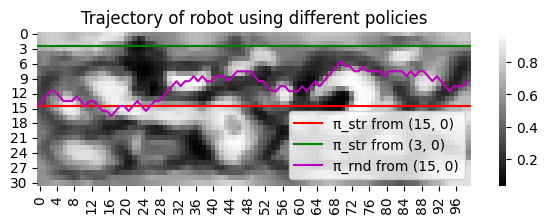

In [63]:
# Plot the trajectory followed by the robot starting from (15, 0) or (3, 0)
plt.figure(figsize=(7,2))
sns.heatmap(mountain.get_map(), cmap="gray")
plt.plot([0, n], [15, 15], c="r", label="π_str from (15, 0)")
plt.plot([0, n], [3, 3], c="g", label="π_str from (3, 0)")
plt.plot(np.arange(n), trajectory, c="m", label="π_rnd from (15, 0)")
plt.title("Trajectory of robot using different policies")
plt.legend()
plt.show()

In [64]:
print("π_str((15, 0)): %.4f" %evaluation_ltr[15][0])
print("π_str((3, 0)): %.4f" %evaluation_ltr[3][0])
print("π_rnd((15, 0)): %.4f" %evaluation_rnd[15][0])

π_str((15, 0)): -0.7819
π_str((3, 0)): -1.3417
π_rnd((15, 0)): -0.2352


------------------------------------------
### 11. (*)

If the robot can choose its initial position and policy, the optimal choice would be $\pi_\text{rnd}$ and starting row 15. This is because $\pi_\text{rnd}((15, 0)) \approx -0.2352$ which is slightly higher than the other $\pi_\text{str}((15, 0)) \approx -0.7819$ and $\pi_\text{str}((3, 0)) \approx -1.3417$.

------------------------------------------

As we can see, following a single action without any exploration makes the evaluation a bit worse! Therefore, exploration is affecting the final results. Using $\pi_\text{rnd}$ which adds a lot of exploration, leads to the evaluation being a bit higher.